Total Revenue per Hotel:
property_name
Atliq Bay        275112187.0
Atliq Blu        276116363.0
Atliq City       302757011.0
Atliq Exotica    338445387.0
Atliq Grands     223939781.0
Atliq Palace     322020077.0
Atliq Seasons     69972085.0
Name: revenue_actual, dtype: float64

Total Bookings per Hotel:
property_name
Atliq Bay        21389
Atliq Blu        21795
Atliq City       23323
Atliq Exotica    23441
Atliq Grands     17035
Atliq Palace     23625
Atliq Seasons     3982
Name: booking_id, dtype: int64

Average Ratings per Hotel:
property_name
Atliq Bay        3.708929
Atliq Blu        3.959650
Atliq City       3.694799
Atliq Exotica    3.619241
Atliq Grands     3.099876
Atliq Palace     3.749545
Atliq Seasons    2.294856
Name: ratings_given, dtype: float64


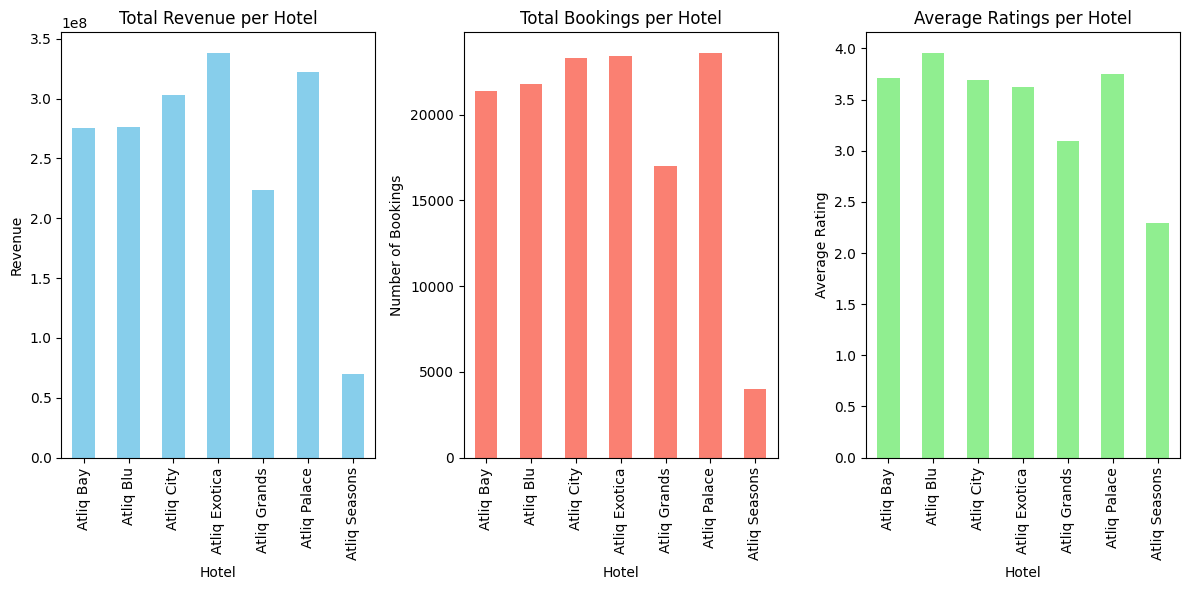

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
dim_date = pd.read_csv("/content/dim_date.csv")
dim_hotels = pd.read_csv("/content/dim_hotels.csv")
dim_rooms = pd.read_csv("/content/dim_rooms.csv")
fact_aggregated_bookings = pd.read_csv("/content/fact_aggregated_bookings.csv")
fact_bookings = pd.read_csv("/content/fact_bookings.csv")

# Merge datasets
fact_merged = pd.merge(fact_bookings, dim_hotels, on='property_id', how='left')
fact_merged = pd.merge(fact_merged, dim_rooms, left_on='room_category', right_on='room_class', how='left')

# Data preprocessing
fact_merged['booking_date'] = pd.to_datetime(fact_merged['booking_date'])
fact_merged['check_in_date'] = pd.to_datetime(fact_merged['check_in_date'])
fact_merged['checkout_date'] = pd.to_datetime(fact_merged['checkout_date'])
dim_date['date'] = pd.to_datetime(dim_date['date'])

# Business logic implementation
fact_merged['booking_duration'] = (fact_merged['checkout_date'] - fact_merged['check_in_date']).dt.days
fact_merged['revenue_deducted'] = fact_merged['revenue_generated'] * 0.4
fact_merged['revenue_actual'] = fact_merged['revenue_generated'] - fact_merged['revenue_deducted']
fact_merged['revenue_actual'] = fact_merged['revenue_actual'].where(fact_merged['booking_status'] == 'Cancelled', fact_merged['revenue_generated'])

# Aggregations
hotel_revenue = fact_merged.groupby('property_name')['revenue_actual'].sum()
hotel_bookings = fact_merged.groupby('property_name')['booking_id'].count()
hotel_avg_rating = fact_merged.groupby('property_name')['ratings_given'].mean()

# Output results
print("Total Revenue per Hotel:")
print(hotel_revenue)
print("\nTotal Bookings per Hotel:")
print(hotel_bookings)
print("\nAverage Ratings per Hotel:")
print(hotel_avg_rating)

# Plotting
plt.figure(figsize=(12, 6))

# Total Revenue per Hotel
plt.subplot(1, 3, 1)
hotel_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Hotel')
plt.xlabel('Hotel')
plt.ylabel('Revenue')

# Total Bookings per Hotel
plt.subplot(1, 3, 2)
hotel_bookings.plot(kind='bar', color='salmon')
plt.title('Total Bookings per Hotel')
plt.xlabel('Hotel')
plt.ylabel('Number of Bookings')

# Average Ratings per Hotel
plt.subplot(1, 3, 3)
hotel_avg_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Ratings per Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()
